<a href="https://colab.research.google.com/github/JonathaCosta/SmartGrid/blob/main/Codes/ModConf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-fuzzy

In [6]:
#@title
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Método utiliza Lógica Fuzzy para definir um valor de conforto em 0 e 1.

"""

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from random import randint,random

class Fz_Comfort():
    
    '''
    Classe aplica métodos para construir uma saída de conforto entre 0,1
    
    * Entrada:  Estado de humor, temperatura e humidade
    
    * Saída: Nível de conforto da carga
        
    '''
    
    def __init__(self,humor,temp,umidade):
        
        # Variáveis linguísticas
        self.temp_in = temp
        self.humor_in = humor
        self.umidade_in = umidade
        
        # Valores das variáveis linguísticas
        self.t = ['muito fria','fria','amena','quente','muito quente']        
        self.h = ['mau','neutro','bom']        
        self.u = ['seco','mediana','alta']
        
        # Função de início da classe        
        self.Vars_Pert()
        self.Rules()        
        self.Comput()
        self.Grap_result() 
        
               
    def Vars_Pert(self):
        '''
        Método cria as variáveis de entrada e saida para o problema
        e atribui o mapeamento entre os valores nítidos e difusos
        utilizando a função de pertinencia
        * Humor       : mau, bom e ótimo. Escala 0 a 10.
        * Temperatura : fria, amena e quente.Escala 0 a 40.
        * Umidade     : baixa, média e alta. Escala 0 a 100.
        * Conforto    : baixo, médio e alto. Escala 0 a 10.
        
        '''       
        
        #Entrada e pertinencia - 01
        self.temp = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')  
        self.temp[self.t[0]] = fuzz.trapmf(self.temp.universe, [0,0,10,18])        
        self.temp[self.t[1]] = fuzz.gaussmf(self.temp.universe, 18,3)         
        self.temp[self.t[2]] = fuzz.gaussmf(self.temp.universe, 25,3)         
        self.temp[self.t[3]] = fuzz.gaussmf(self.temp.universe, 35,4)         
        self.temp[self.t[4]] = fuzz.gaussmf(self.temp.universe, 38,4)                
  
        #Entrada e pertinencia - 02
        self.umidade = ctrl.Antecedent(np.arange(0,100,1), 'umidade')
        self.umidade[self.u[0]] = fuzz.trapmf(self.umidade.universe, [0,0,25,35])
        
        # self.umidade.automf(names = self.u)        
        
        #Entrada e pertinencia - 03
        self.humor = ctrl.Antecedent(np.arange(0,10,1), 'humor')
        self.humor.automf(names = self.h)                        
                      
        #Saída e pertinencia
        self.conf = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'conforto')  
        self.conf.automf(names=['baixo','médio','alto'])

        
    def Rules(self):

        self.rule1 = ctrl.Rule(self.humor[self.h[0]] | self.temp[self.t[0]], self.conf['alto'])
        self.rule2 = ctrl.Rule(self.humor[self.h[1]] | self.temp[self.t[1]], self.conf['médio'])
        self.rule3 = ctrl.Rule(self.humor[self.h[2]] |self.umidade[self.u[0]], self.conf['baixo'])
                        
        
        self.conf_ctrl = ctrl.ControlSystem([self.rule1, self.rule2, self.rule3])
        self.conf_simulador = ctrl.ControlSystemSimulation(self.conf_ctrl)    

    def Comput(self):
        
        self.conf_simulador.input['temperatura'] = self.temp_in
        self.conf_simulador.input['umidade'] = self.umidade_in
        self.conf_simulador.input['humor'] = self.humor_in      # Chamada pela label
                
        self.conf_simulador.compute()
                
    def Grap_result(self):
        #Resultados
        # self.temp.view(sim=self.conf_simulador)
        # self.humor.view (sim=self.conf_simulador)        
        self.umidade.view(sim=self.conf_simulador)
        # self.comfort.view(sim=self.conf_simulador)
           

class Fz_sim(Fz_Comfort):
    
    ''' 
    Classe evoca métodos da classe Fz_Comfort para definir valores de conforto.
    Utiliza como input valores randomicos das 3 variáveis de entrada.
    '''
    def __init__(self, 
                 temp = round(randint(0, 40)+random(),1),
                 umid = round(randint(0, 101),1),
                 humor = round(randint(0, 9)+random(),1)
                 ):
        self.h = humor  
        self.t = temp
        self.u = umid
        
    def Fuzificar(self,imprimir=0):
        
        res = Fz_Comfort(self.h,self.t,self.u).conf_simulador.output['conforto']
        if imprimir == 1:
            print('Input:\n\tHumor:',self.h,'| Sensação térmica:',self.t,'| Umidade:',self.u,
                  '\n\tConforto atribuído:',res,'\n')     
        else:
            None
        return res


Input:
	Humor: 3.9 | Sensação térmica: 18.6 | Umidade: 20 
	Conforto atribuído: 0.42105174427545605 

Input:
	Humor: 3.9 | Sensação térmica: 18.6 | Umidade: 40 
	Conforto atribuído: 0.5061467281264705 

Input:
	Humor: 3.9 | Sensação térmica: 18.6 | Umidade: 60 
	Conforto atribuído: 0.5061467281264705 

Input:
	Humor: 3.9 | Sensação térmica: 18.6 | Umidade: 80 
	Conforto atribuído: 0.5061467281264705 



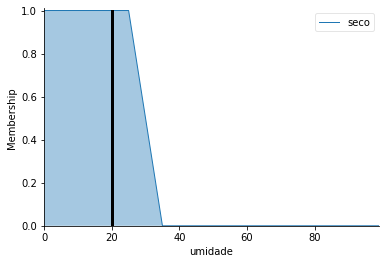

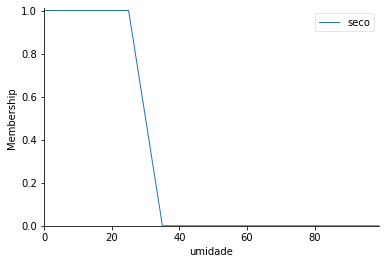

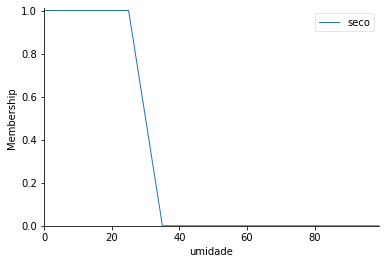

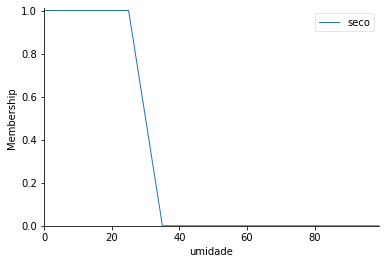

In [7]:
        
# =============================================================================
# Área de test
# =============================================================================
for i in [20,40,60,80]:
    Fz_sim(umid=i).Fuzificar(1)

